## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

Present dataset has tweets related to 6 leading US airlines. The sentiment of each tweet is also added.

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

## Objective:

The purpose of this project is to explore the numerous features and build a classification model where we will be able to tag the sentiment based on the tweet text and consequently label them positive, negative and neutral. We will be using different data processing steps to reduce the dimensionality and get the best words which will help in the classification. Models based on countvectorizer and Td-idf will be compared based on accuracy scores.


In [1]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

#nltk.download('stopwords')    #download stopwords
#nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [3]:
data.head()     #First 5 rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data['airline_sentiment'].value_counts()  #Count of each sentiment

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

#### Observation
There are 3 sentiments expressed in the tweets - positive, negative and neutral

In [5]:
data.shape         #print shape of data

(14640, 15)

In [6]:
data['airline'].value_counts()   #Count of each airline

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

### Observation 

There are 6 different airlines namely United, US airways, American, Southwest, Delta and Virgin America

In [7]:
data.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

#### Observation

There are plenty of missing values in many columns but there are no missing values in text and airline fields

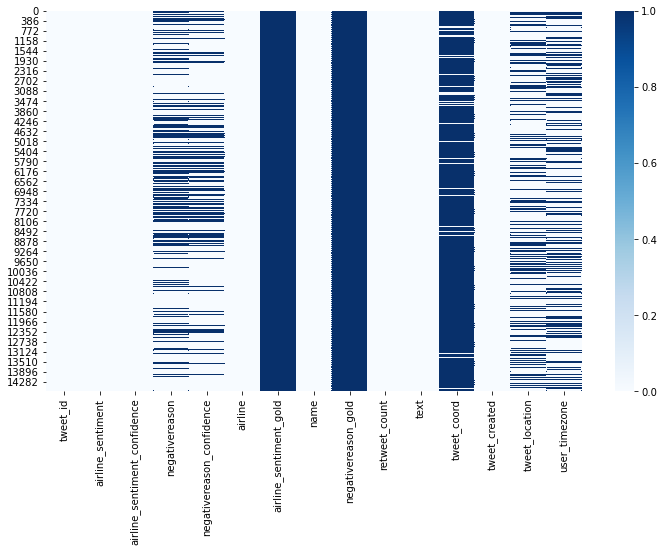

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.show()

In [9]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


#### Conclusion

There are a number of null values in negativereason_confidence. Airline_sentiment_confidence of more than 50% tweets is 1 which is mostly negative.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

#### Observation

Tweet_id and retweet_count are integer values.

airline_sentiment_confidence and negativereason_confidence are float values

All other parameters are object type

negativereason, negativereason_confidence, airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location and user_timezone have null values

### Sentiment distribution for all Airlines

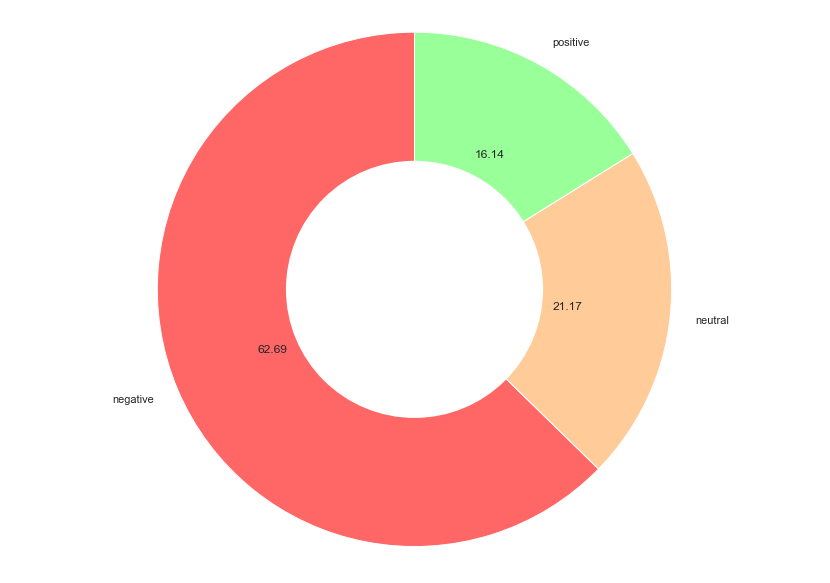

In [11]:
#plot for Social Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['airline_sentiment'].value_counts(), labels=data['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Observation

Most of the sentiments are negative in nature which indicates that that customers are not happy with service or have some issues with airlines. Positive tweets are least.

In [12]:
#Count of Tweets for each airline

grouped_df = data.groupby('airline').count()[['text']]
grouped_df

,text
airline,
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


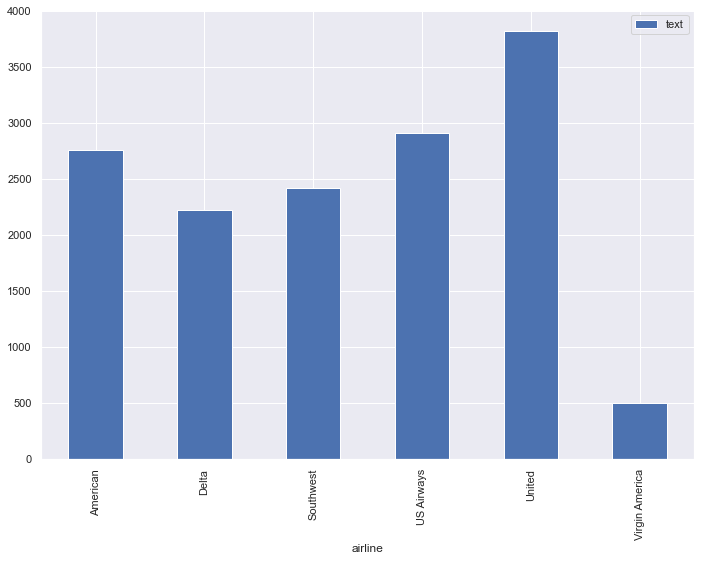

In [13]:
#Plot for count of each airline

grouped_df.plot(kind='bar')
plt.show()


#### Observation

Maximum number of tweets are for United Airlines. US Airways and American airlines have the next highes number of tweets.
While Virgin America has received the least number of tweets

<AxesSubplot:xlabel='airline', ylabel='count'>

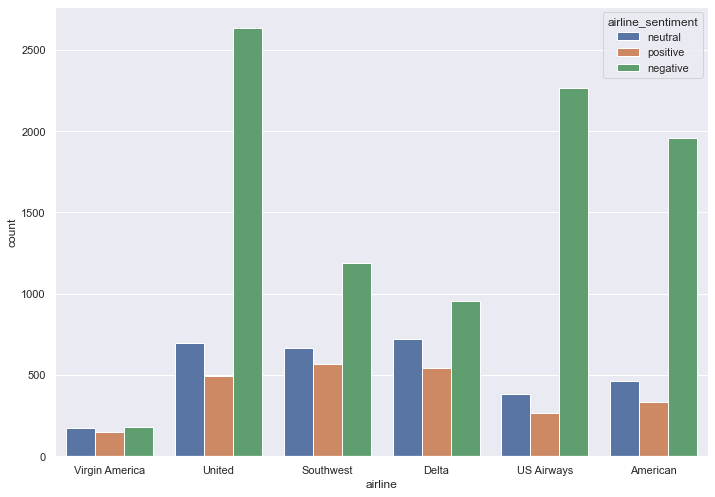

In [14]:
sns.countplot(data = data, x ='airline', hue = 'airline_sentiment')

#### Observation

United airlines, US Airways  and American airlines have nearly or more than 2000 negative tweets. The positive reviews for these airlines is very less compared to negative ones. 

Virgin America has the least number of total tweets but the distribution of tweets amon positive, negative and neutral for Virgin America is almost equal. 

South west and Delta Airlines have similar distribution of tweets but like other airlines they too have more negative sentiment tweets.

## Sentiment distribution and negative reason distribution for different Airlines


### Virgin America Airlines

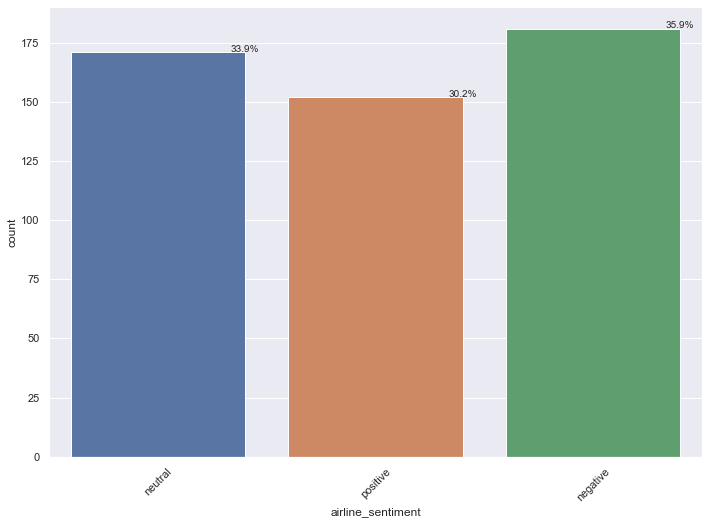

In [15]:
#plot the distribution of the class label

def bar_plot(data, feature,):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    #plt.title = title
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() 
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x,y),ha="center",
            va="center",
            size=10,
            xytext=(0, 3),
            textcoords="offset points")
    plt.xticks(rotation=45)
    plt.show()
    
data_Virgin_America = data.loc[data['airline'] == 'Virgin America']
    
bar_plot(data_Virgin_America,'airline_sentiment')

#### Observation

Number of negative and neutral sentiments are almost same. Even positive sentiments are also almost same in number. Virgin America has least number of entries compared to other airlines.

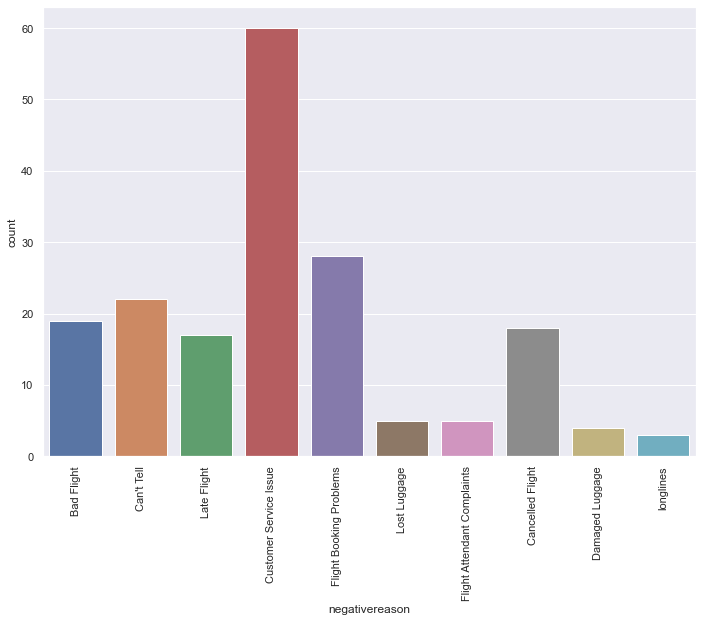

In [16]:
# Count of each negative reason for Virgin America Airline

sns.countplot(data = data_Virgin_America, x='negativereason')
plt.xticks(rotation=90)
plt.show()

#### Observation

The major negative reason which has resulted in negative sentiment for the airlines is Customer Service. The major negative reasons contributing to negative sentiments among customers are Flight booking problems, late, bad and cancelled flight.




### Delta Airlines

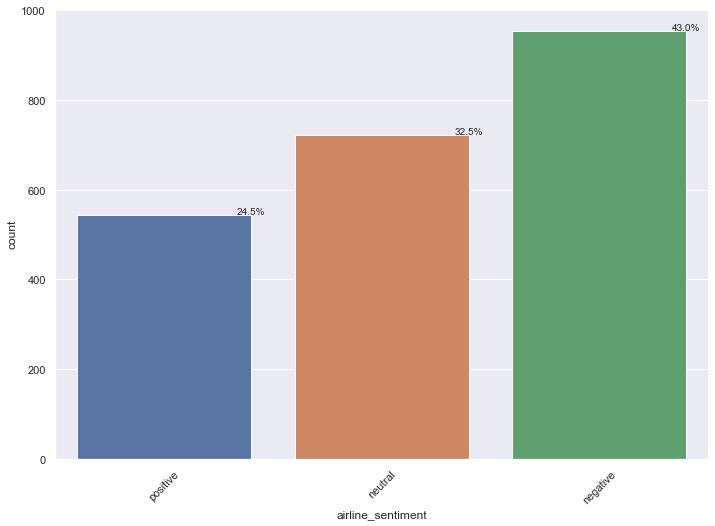

In [17]:
#plot the distribution of class label for Delta Airlines

data_delta = data.loc[data['airline'] == 'Delta']
    
bar_plot(data_delta,'airline_sentiment')

#### Observation

For Delta airlines as well negative tweets make the majority number of tweets. Almost 43% of the total tweets are negative

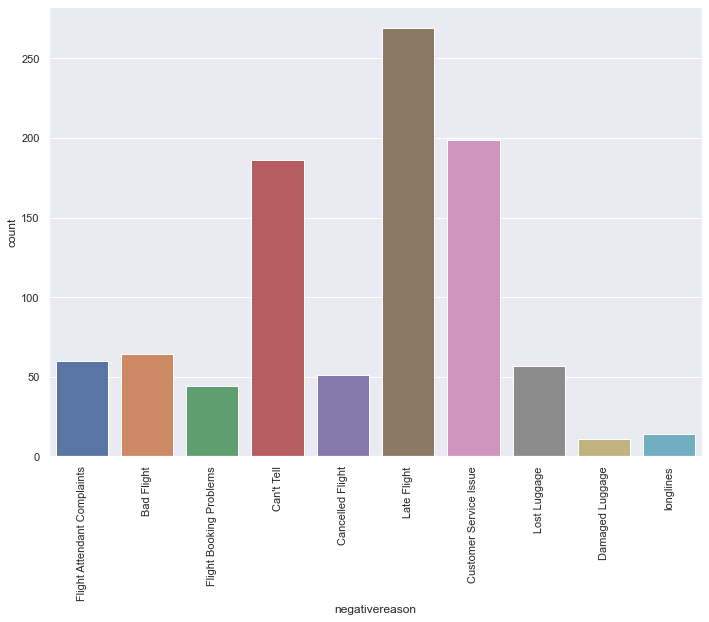

In [18]:
# Count of each negative reason for Delta Airlines

sns.countplot(data = data_delta, x='negativereason')
plt.xticks(rotation=90)
plt.show()

#### Observation

Since, negative sentiment make majority the main reason for unhappiness among the customer sis late flight and customer service.

### Southwest Airlines

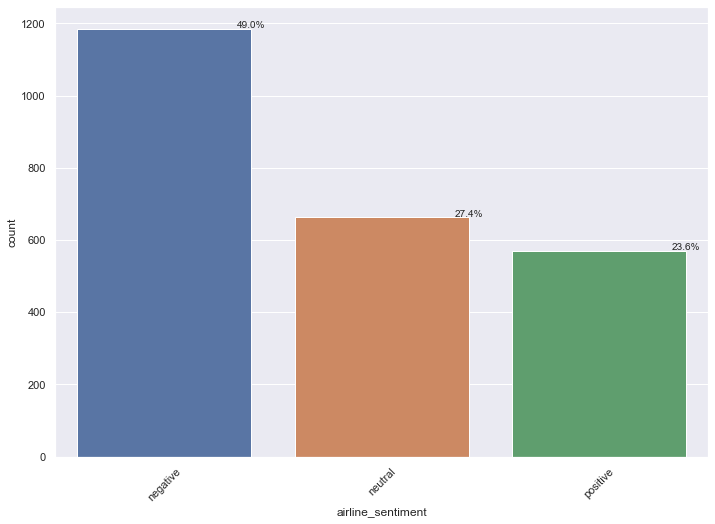

In [19]:
#plot the distribution of class label for Southwest Airlines


data_Southwest = data.loc[data['airline'] == 'Southwest']
    
bar_plot(data_Southwest,'airline_sentiment')

#### Observation
Even for Southwest airlines the negative sentiments are maximum. Let's check which are the main negative reason the customers have tweeted the most.

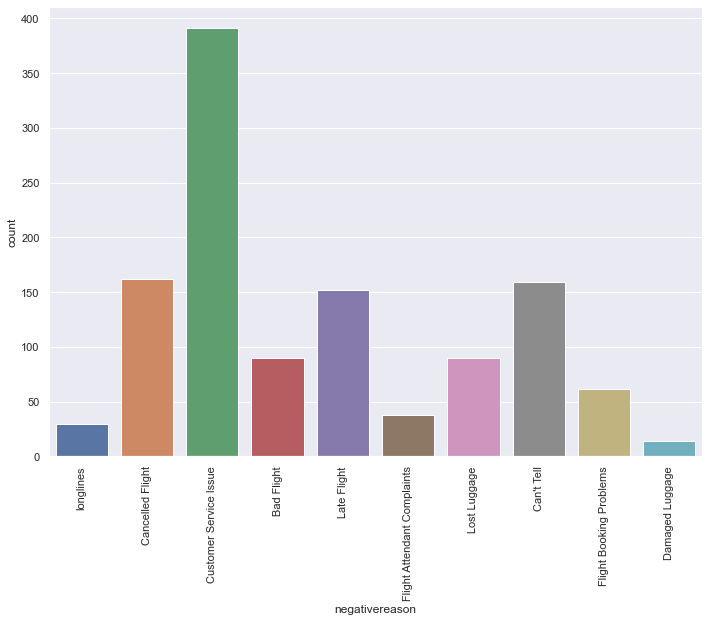

In [20]:
# Count of each negative reason for Southwest Airlines

sns.countplot(data = data_Southwest, x='negativereason')
plt.xticks(rotation=90)
plt.show()

#### Observation

Most of the customers are not happy with customer service of Southwest Airlines. Other major issues faced by the airlines are related to cancelled flight and late flight

### American Airlines

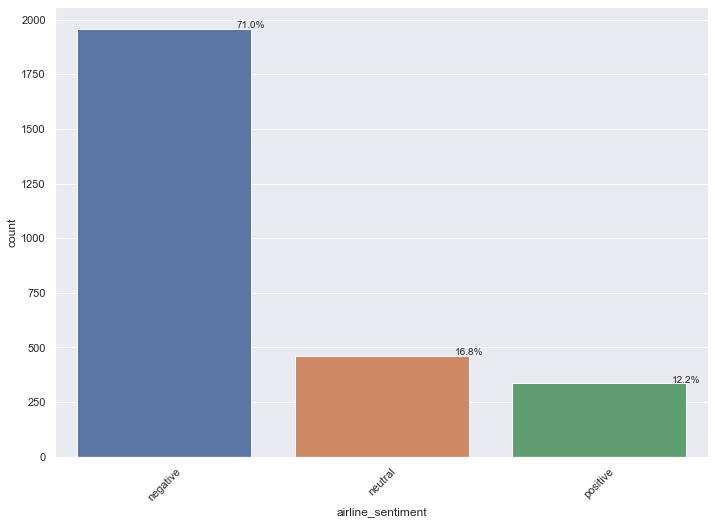

In [21]:
#plot the distribution of class label for American Airlines

data_American = data.loc[data['airline'] == 'American']
    
bar_plot(data_American,'airline_sentiment')


#### Observation

Among the 2759 tweets received by American Airlines 71% (close to 2000 tweets) ar enegative. Only 12% of tweets are positive

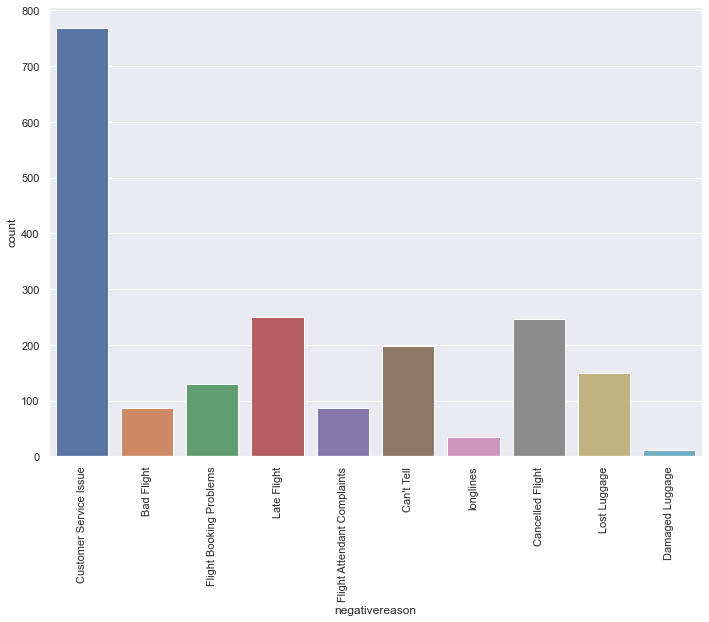

In [22]:
# Count of each negative reason for American Airlines

sns.countplot(data = data_American, x='negativereason')
plt.xticks(rotation=90)
plt.show()

#### Observation

Most of the negative tweets for the airlines complain about the customer service of the airlines

### US Airways

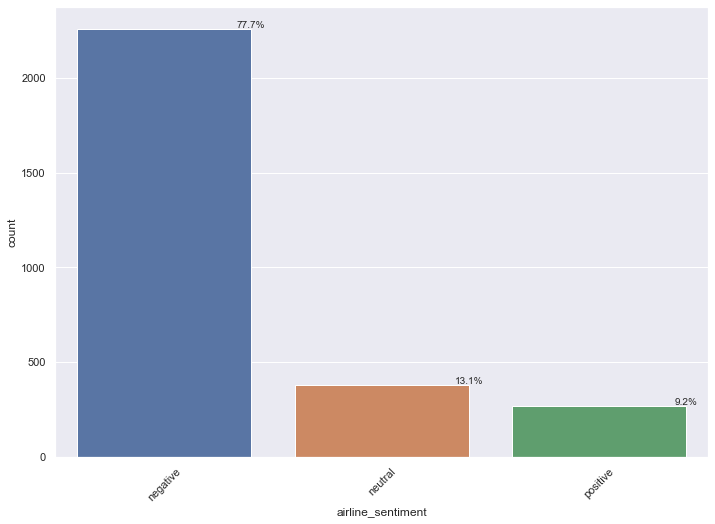

In [23]:
#plot the distribution of class label for US Airways

data_USAirways = data.loc[data['airline'] == 'US Airways']
    
bar_plot(data_USAirways,'airline_sentiment')



#### Observation

Among the 2913 tweets for the airline almost 78% are negative. Only 9% are positive

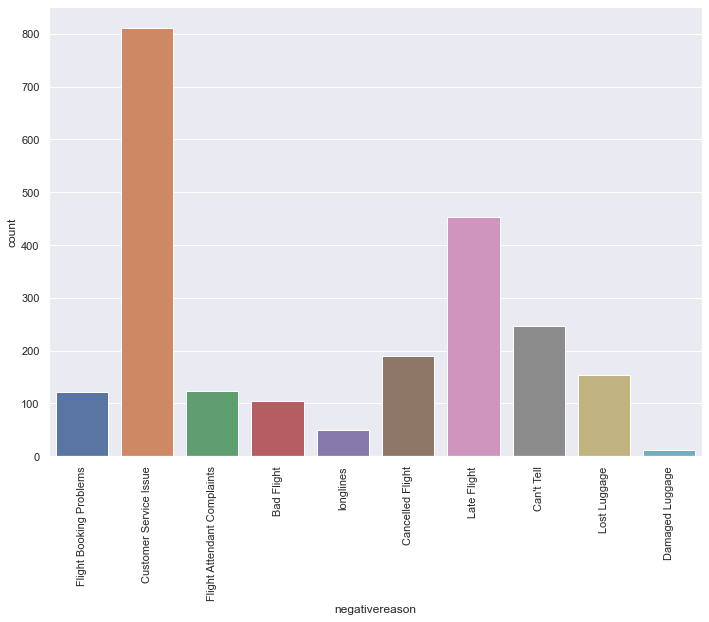

In [24]:
# Count of each negative reason for US Airways

sns.countplot(data = data_USAirways, x='negativereason')
plt.xticks(rotation=90)
plt.show()

#### Observation

Customer service is the main negative reason. Nearly 800 tweets are related to this issue. Late flight issue is also a main concern.

### United Airlines

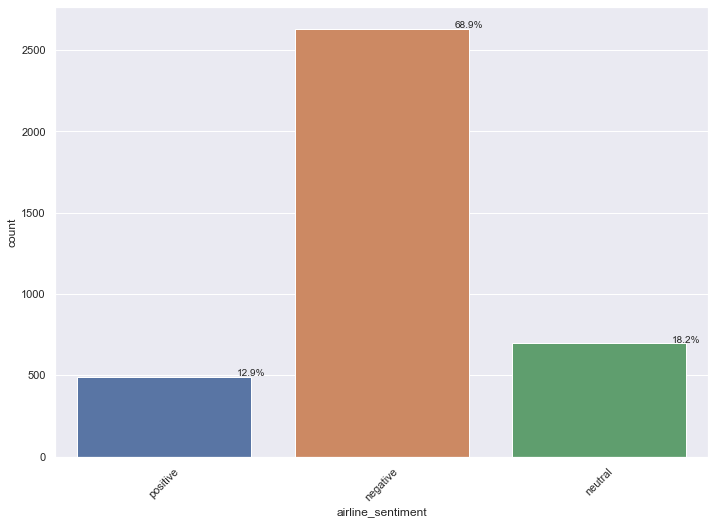

In [25]:
#plot the distribution of class label for United Airlines


data_United = data.loc[data['airline'] == 'United']
    
bar_plot(data_United,'airline_sentiment')

#### Observation

Among the 3822 tweets received by United Airlines almost 70 % are negative. Let's check the main negative reasons contributing to this negative sentiment for the airlines

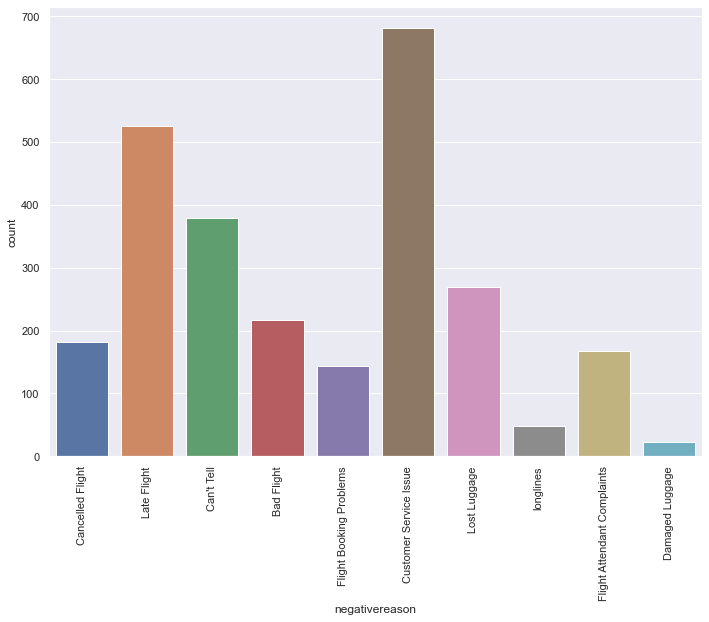

In [26]:
# Count of each negative reason for United Airlines

sns.countplot(data = data_United, x='negativereason')
plt.xticks(rotation=90)
plt.show()

#### Observation

Majority of the negative tweets are related to customer care service, late flight and lost luggage.

### Wordcloud for Negative tweets


In [27]:
from wordcloud import WordCloud,STOPWORDS

In [28]:
#creating word cloud for negative reviews
negative_sentiments=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_sentiments['text'])
cleaned_word = " ".join([word for word in words.split()])

In [29]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

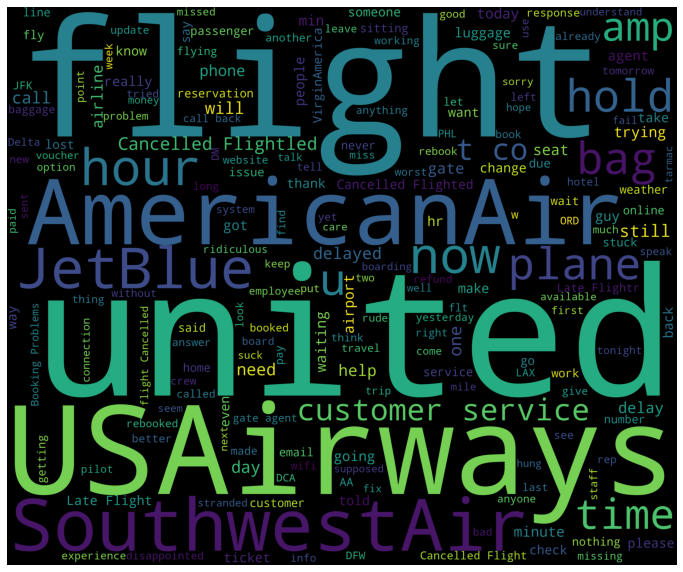

In [30]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation

late flight, delayed, cancelled flight, stuck, lost, united, USAirways, SouthwesrAir, wait,bad, problem, missing, never, booking problems, missed, hold, waiting, dissapointed are some of the negative words

### Wordcloud for Positive tweets 

In [31]:
#creating word cloud for negative reviews
positive_sentiments=data[data['airline_sentiment']=='positive']
words = ' '.join(positive_sentiments['text'])
cleaned_word = " ".join([word for word in words.split()])

In [32]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

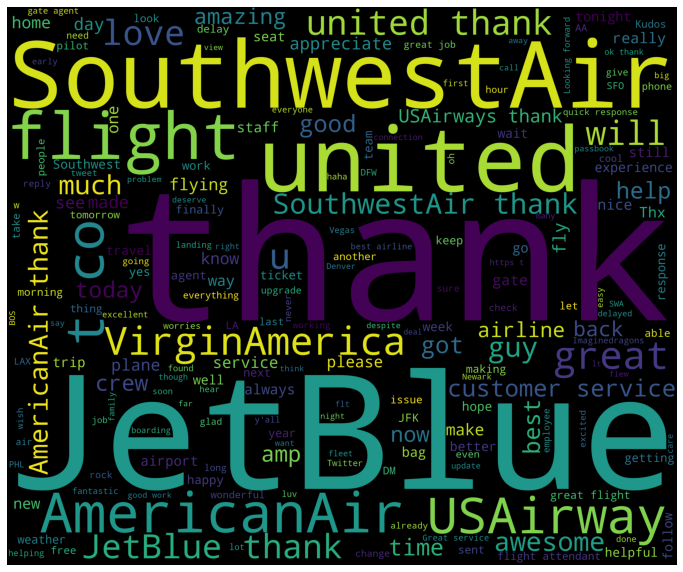

In [33]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation

helpful,thank,nice, great,helpful,appreciate, good, love, quick response, awesome, best, excited, best airline, glad, better, fantastic, amazing etc are some of the positive words from the word cloud

JetBlue is present in the wordcloud but its not there among the 6 airlines present in the dataset. There could have been a comparison between one of the 6 airlines with JetBlue or JetBlue could have codeshared with any of the 6 airlines which is there were tweets on JetBlue.


### Wordcloud for Neutral tweets

In [34]:
#creating word cloud for negative reviews
positive_sentiments=data[data['airline_sentiment']=='neutral']
words = ' '.join(positive_sentiments['text'])
cleaned_word = " ".join([word for word in words.split()])

In [35]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

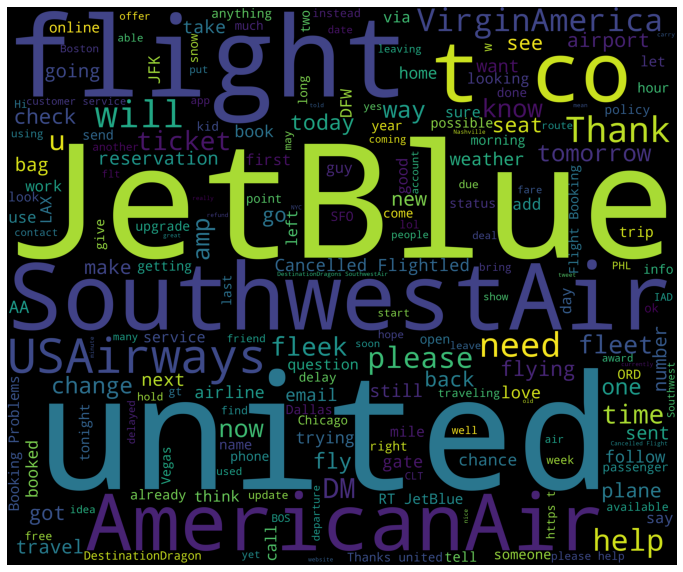

In [36]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observations

delay, airport, late, waiting, cancelled, baggage, please, rebooked, sorry, experience, stranded, trying, response, pilot, customer, check, seat, without, Americanair, unites, southwest,help, customer service etc are some of the words from neutral wordcloud

### Understanding of Data Columns

In [37]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [39]:
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


#### Observation

1. tweet_id : Unique id for each tweet. This field won't be necessary for model building.

2. airline_sentiment : This feature has 3 values - neutral, positive and negative. This column doesn't have any null values

3. airline_sentiment_confidence : The values of this column depends on airline_sentiment. Negative sentiment has value 1 while its a very low value for positive sentiment. This is not a necessary field for model building.

4. negativereason - Field has null values. This gives reason for negative sentiment.

5. negativereason_confidence - These values are based on negative reason and sentiment. There are many null values in the field.

6. airline - This feature give airlines names. 

7. airline_sentiment_gold - Most of the fields in this column are empty

8. name - gives the name of the person who has added the tweet

9. retweet_count - this column has int values. Most of the values are 0 which means most of the tweets were not retweeted. This is not a necessary field for model building.

10. text - The tweet text. This field needs pre-processing

11. tweet_coord - Most of the fields are null in this. This is not a necessary field for model building

12. tweet_created - This gives the time and date at which the tweet was created.

13. tweet_location - this gives the location from where the tweet was sent.

14. user_timezone - this give the timezone of the user.


Among all the fields, only text and airline sentiment is necessary for model building. All other fields can be eliminated.

#### Eliminating the fields that are not necessary

In [40]:
data = data.drop(['tweet_id', 'airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis = 1)

In [41]:
data = data.drop(['negativereason_gold'], axis = 1)

In [42]:
data.shape           #shape of data

(14640, 2)

In [43]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)


data.head(5)          #first 5 rows of the dataset

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


#### Observation

The new dataset has 14640 rows and 2 columns namely airline_sentiment and text.

## Data Pre - Processing

Text Pre-processing steps:


Remove html tags.

Replace contractions in string. (e.g. replace I'm --> I am) and so on.

Remove numbers.

Tokenization

To remove Stopwords.

Lemmatized data

In [44]:
#Stripping html tags

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [45]:
#Replacing contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [46]:
# Removing numbers from text

def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [47]:
#Tokenization

data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [48]:
#Creating list of stopwords

stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))    

In [49]:
#Pre-processing and normalizing text data

lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)     #Join the words in the list to convert back to text string in the data frame

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


### Word Cloud based on Normalized text

In [50]:
#creating word cloud for negative reviews

negative_sentiments=data[data['airline_sentiment']=='negative']
words = ' '.join(negative_sentiments['text'])
cleaned_word = " ".join([word for word in words.split()])

In [51]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

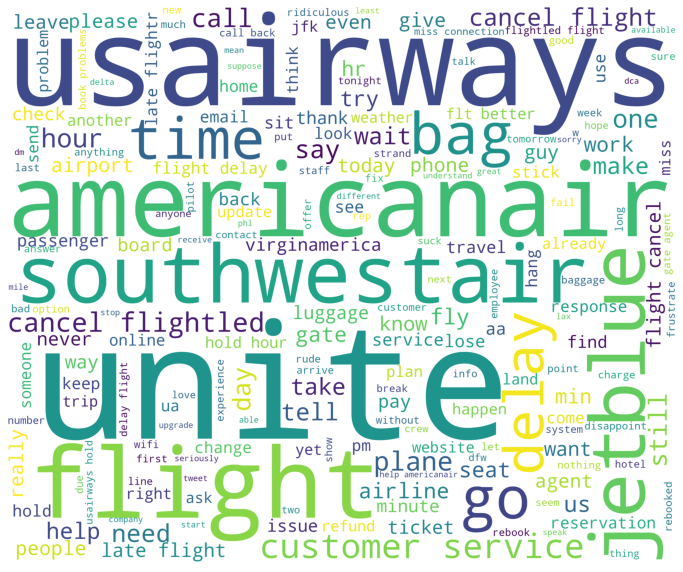

In [52]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation

cancel flight, problem,refund,jetblue, late flight, luggage, book problems, issue upgrade, usairways, wait, hold hour, bad guy, gate, bag, time etc are some of the words from negative wordcloud after preprocessing and normalizing

In [53]:
#creating word cloud for POSITIVE reviews

positive_sentiments=data[data['airline_sentiment']=='positive']
words = ' '.join(positive_sentiments['text'])
cleaned_word_positive = " ".join([word for word in words.split()])

In [54]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_positive)

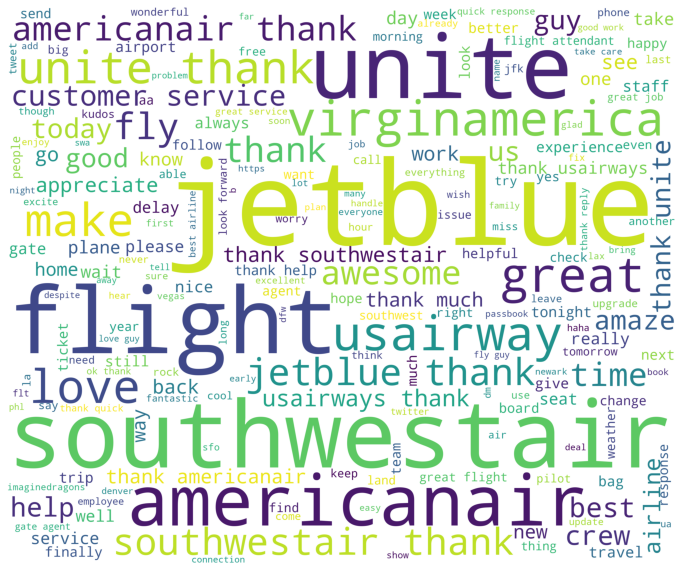

In [55]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation

Amaze, wonderful, thank, love, jetblue, help, great flight, great job, american air, appreciate, quick response, good work, glad, happy always, cool, haha, excite, big, free, great service, yes etc are some of the words from positive word cloud.

#### Creating word cloud for neutral reviews

In [56]:
#creating word cloud for NEUTRAL reviews

neutral_sentiments=data[data['airline_sentiment']=='neutral']
words = ' '.join(neutral_sentiments['text'])
cleaned_word_neutral = " ".join([word for word in words.split()])

In [57]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word_neutral)

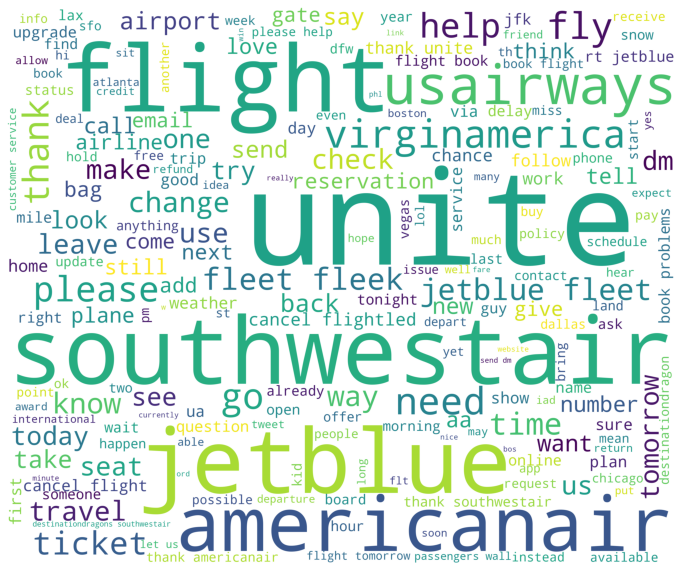

In [58]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Observation

Check, travel, ticket, thank, try, need, please, american, virginamerica, think, fleet, today, gate, plane, jetblue, airport, upgrade, leave, time, reservation, weather, question etc are words from neutral wordcloud

## Supervised Learning for Sentiment Analysis


### Bag of Words (CountVectorizer)

In [59]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=1000)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['text'])

data_features = data_features.toarray() 

In [60]:
data_features.shape

(14640, 1000)

In [61]:
X = data_features

y = data.airline_sentiment

In [62]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [63]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,50).tolist()
base_ln

[100, 150, 200, 250, 300, 350]

In [64]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b, n_jobs=4)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

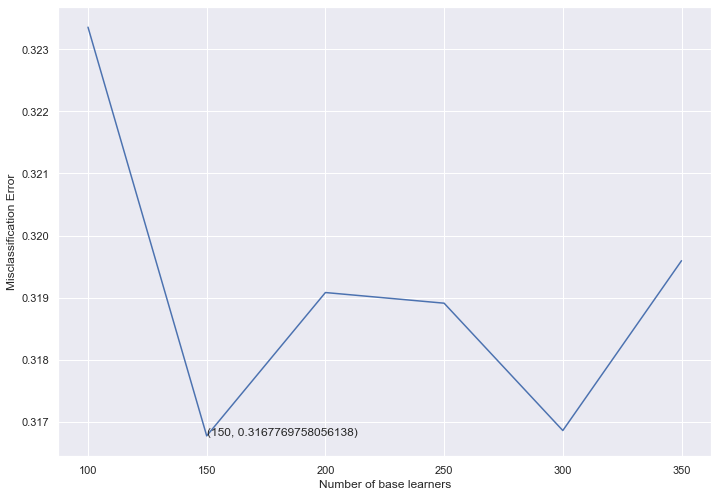

In [65]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [66]:
# Training the best model using optimal_learners and calculating accuracy on test data .

clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['positive' , 'negative' , 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    positive       0.86      0.91      0.88      2087
    negative       0.55      0.45      0.50       482
     neutral       0.70      0.63      0.67       359

    accuracy                           0.80      2928
   macro avg       0.70      0.66      0.68      2928
weighted avg       0.79      0.80      0.79      2928

Accuracy of the model is :  0.7978142076502732


#### Observation

Model accuracy is 79.78 which is good. The model is good at predicting the positive sentiments but its not good at identifying the negative sentiments. The optimal number of learners are 150 at 0.3167 misclassification error.

#### Confusion Matrix

[[1890  145   52]
 [ 220  219   43]
 [  97   35  227]]


<AxesSubplot:>

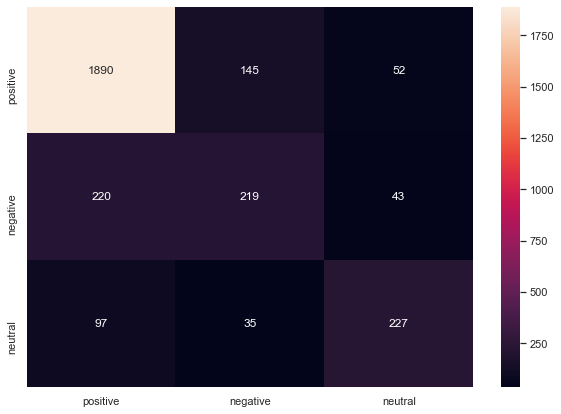

In [67]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive' , 'negative' , 'neutral']],
                  columns = [i for i in ['positive' , 'negative' , 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation

We can see that majority of the negative tweets are missclassified as positive. This can be because there are a lot of common words in positive and negative sentiments.

#### Plotting the top 40 features in the wordcloud

thank,not,usairways,delay,great,jetblue,unite,http,flight,southwestair,love,hold,awesome,get,hours,bag,cancel,wait,best,hour,virginamerica,amaze,please,time,would,customer,go,make,fly,service,help,call,need,follow,plane,dm,good,airline,try,us,
 
 


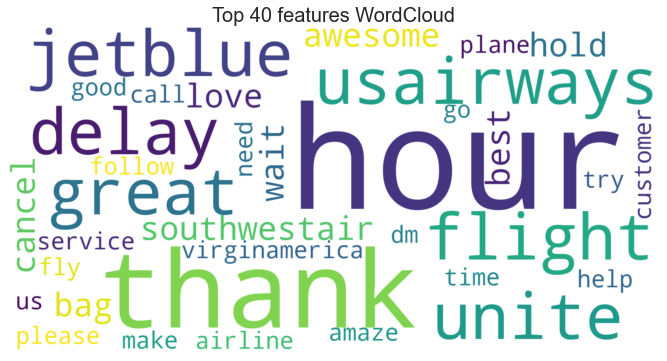

In [68]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## TF-IDF

Term Frequency - Inverse Document Frequency: It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [69]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000)
data_features = tfidf_vect.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 1000)

In [70]:
X = data_features

y = data.airline_sentiment

In [71]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

In [72]:
# Finding optimal number of base learners using k-fold CV ->

base_ln = np.arange(150, 450, 50).tolist()
base_ln

[150, 200, 250, 300, 350, 400]

In [73]:
# K-Fold Cross - validation .

cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

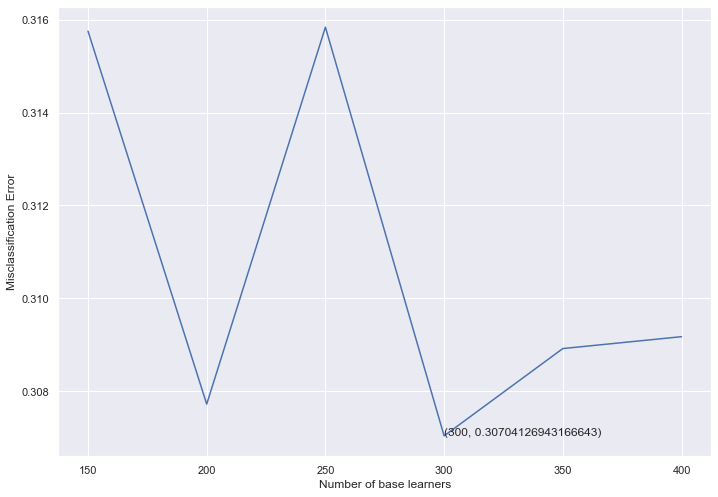

In [74]:
# plotting the error as k increases

error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

#### Observation

The error is seen to be reducing initially but there is a hike and a dip. After 300 learners and an error of 0.307 the error seems to increase. Compared to CountVectorizer the misclassification error is lesser for TF-IDF

In [75]:
# Training the best model and calculating accuracy on test data .

clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['positive' , 'negative' , 'neutral']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    positive       0.81      0.97      0.88      2087
    negative       0.64      0.22      0.33       482
     neutral       0.76      0.60      0.67       359

    accuracy                           0.80      2928
   macro avg       0.74      0.60      0.63      2928
weighted avg       0.78      0.80      0.77      2928

Accuracy of the model is :  0.7984972677595629


#### Observation

The accuracy of the model based on TF-IDF vectorizer is 0.7984 slightly higher than count vectorizer. The positive labels are being predicted in a better way. The precision of neutral has improved but the recall score has dropped. Recall and f1-score for negative labels has dropped further compared to earlier model. Overall accuracy is almost the same and prediction of positive label has improved.

[[2015   42   30]
 [ 339  106   37]
 [ 124   18  217]]


<AxesSubplot:>

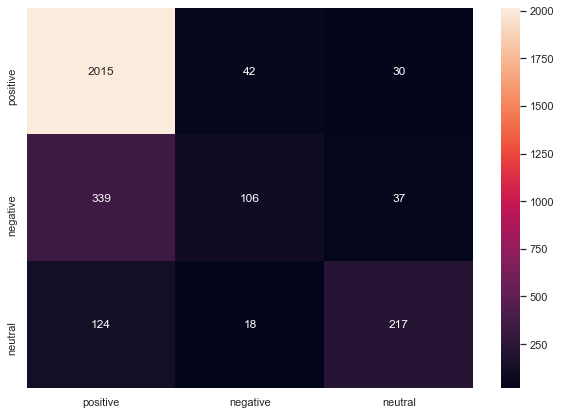

In [76]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive' , 'negative' , 'neutral']],
                  columns = [i for i in ['positive' , 'negative' , 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation

More positive labels are being correctly predicted. Most of the negative labels are being predicted as positive. 

### Printing top 40 features in wordCloud

thank, not, jetblue, unite, southwestair, usairways, http, great, delay, flight, virginamerica, love, hold, get, awesome, hours, cancel, wait, best, bag, please, fly, amaze, follow, hour, dm, service, would, help, good, time, make, need, go, call, customer, tomorrow, know, plane, airline, 
 
 


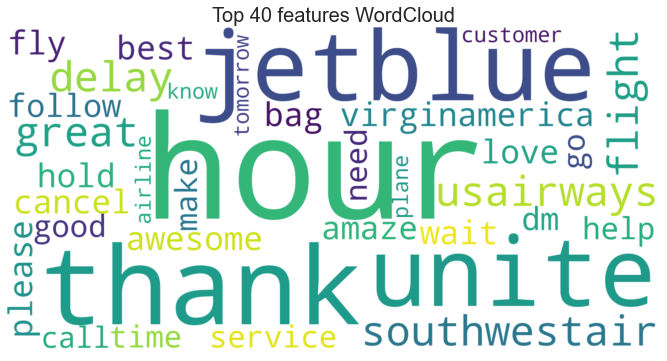

In [77]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(8, 10), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF

In [78]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,negative,negative
1,negative,negative,negative
2,positive,positive,positive
3,negative,negative,negative
4,negative,negative,negative


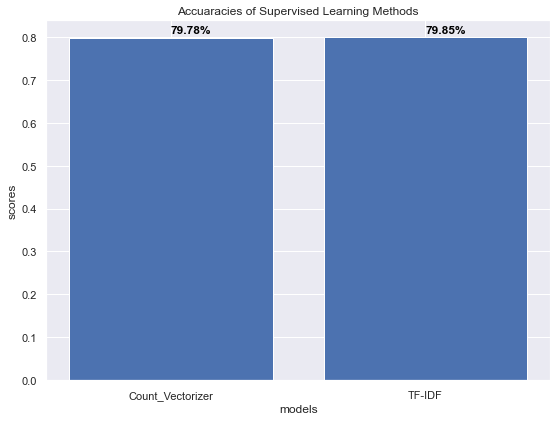

In [79]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

#### Observation

Accuracies of both models are comparable. The prediction of positive and neutral classes are better with TF-IDF vectorizer as the recall and precision scores are better than count vectorizer. Negative class prediction has to be increased.

## Unsupervised Learning methods for Sentiment Analysis

### VADER

In [80]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lukemarc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
data_new = data.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

data_new.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [82]:
#Calculate the polarity score of the reviews

data_new['scores'] = data_new['text'].apply(lambda text: sentiment.polarity_scores(text))

data_new.head()

,airline_sentiment,text,scores
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,positive,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,neutral,virginamerica not today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}"
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}"


In [83]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head(20)

,airline_sentiment,text,scores,compound
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,positive,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,neutral,virginamerica not today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",-0.3306
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",-0.5829
5,negative,virginamerica seriously would pay flight seat not play really bad thing fly va,"{'neg': 0.299, 'neu': 0.523, 'pos': 0.178, 'compound': -0.0179}",-0.0179
6,positive,virginamerica yes nearly every time fly vx ear worm not go away,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}",0.4019
7,neutral,virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp,"{'neg': 0.136, 'neu': 0.645, 'pos': 0.22, 'compound': 0.2893}",0.2893
8,positive,virginamerica well notbut,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}",0.2732
9,positive,virginamerica amaze arrive hour early good,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}",0.7506


In [84]:
# Defining all the conditions inside a function

def condition(x):
    if x>0:
        return "positive"
    elif x<0:
        return "negative"
    else:
        return 'neutral'
 
# Applying the conditions

data_new['predicted_sentiment'] = data_new['compound'].apply(condition)
 
#Displaying the dataset which includes the predicted sentiment

data_new.head(10)

,airline_sentiment,text,scores,compound,predicted_sentiment
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
1,positive,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,neutral,virginamerica not today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",-0.3306,negative
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",-0.5829,negative
5,negative,virginamerica seriously would pay flight seat not play really bad thing fly va,"{'neg': 0.299, 'neu': 0.523, 'pos': 0.178, 'compound': -0.0179}",-0.0179,negative
6,positive,virginamerica yes nearly every time fly vx ear worm not go away,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.4019}",0.4019,positive
7,neutral,virginamerica really miss prime opportunity men without hat parody https tcomwpggrezp,"{'neg': 0.136, 'neu': 0.645, 'pos': 0.22, 'compound': 0.2893}",0.2893,positive
8,positive,virginamerica well notbut,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.2732}",0.2732,positive
9,positive,virginamerica amaze arrive hour early good,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}",0.7506,positive


In [85]:
# Adding the Vader predicted sentiment to the original dataset

data["VADER_pred"] = data_new['predicted_sentiment'].tolist()
data.head()

,airline_sentiment,text,VADER_pred
0,neutral,virginamerica dhepburn say,neutral
1,positive,virginamerica plus add commercials experience tacky,neutral
2,neutral,virginamerica not today must mean need take another trip,neutral
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,negative,virginamerica really big bad thing,negative


In [86]:
#Calculating accuracy of the model

print(classification_report(data["airline_sentiment"].tolist() , data["VADER_pred"].tolist() , target_names = ['positive' , 'negative' , 'neutral']))
print("Accuracy of the model is : ",accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()))

              precision    recall  f1-score   support

    positive       0.89      0.47      0.61      9178
    negative       0.38      0.41      0.39      3099
     neutral       0.32      0.87      0.47      2363

    accuracy                           0.52     14640
   macro avg       0.53      0.58      0.49     14640
weighted avg       0.69      0.52      0.54     14640

Accuracy of the model is :  0.5217896174863388


[[4300 1917 2961]
 [ 432 1281 1386]
 [ 104  201 2058]]


<AxesSubplot:>

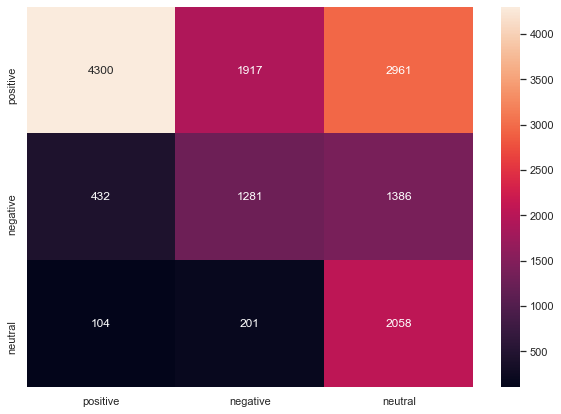

In [87]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation

The accuracy of the model is quite low compared to Countvectorizer or TF-IDF. Accuracy is only 0.52. Most of the negative class is mis-classified as Neutral.  

## TextBlob

In [88]:
from textblob import TextBlob

In [89]:
#Calculate the polarity score of the reviews

data_new['polarity']  = data_new['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()

,airline_sentiment,text,scores,compound,predicted_sentiment,polarity
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.00000
1,positive,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.00000
2,neutral,virginamerica not today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,-0.31250
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",-0.3306,negative,0.00625
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",-0.5829,negative,-0.35000


In [90]:
#Classify the class of the text 

# Defining all the conditions inside a function
def condition(x):
    if x>0:
        return "positive"
    elif x<0:
        return "negative"
    else:
        return 'neutral'
 
# Applying the conditions
data_new['polarity_score'] = data_new['polarity'].apply(condition)
 

data_new.head()

,airline_sentiment,text,scores,compound,predicted_sentiment,polarity,polarity_score
0,neutral,virginamerica dhepburn say,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.00000,neutral
1,positive,virginamerica plus add commercials experience tacky,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,0.00000,neutral
2,neutral,virginamerica not today must mean need take another trip,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral,-0.31250,negative
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,"{'neg': 0.345, 'neu': 0.468, 'pos': 0.187, 'compound': -0.3306}",-0.3306,negative,0.00625,positive
4,negative,virginamerica really big bad thing,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'compound': -0.5829}",-0.5829,negative,-0.35000,negative


In [91]:
#Adding prediction to original dataset

data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,airline_sentiment,text,VADER_pred,Text_Blob_pred
0,neutral,virginamerica dhepburn say,neutral,neutral
1,positive,virginamerica plus add commercials experience tacky,neutral,neutral
2,neutral,virginamerica not today must mean need take another trip,neutral,negative
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative,positive
4,negative,virginamerica really big bad thing,negative,negative


In [92]:
#Printing the accuracy and model scores

print(classification_report(data["airline_sentiment"].tolist() , data["Text_Blob_pred"].tolist() , target_names = ['positive' , 'negative' , 'neutral']))
print("Accuracy of the model is : ",accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist()))

              precision    recall  f1-score   support

    positive       0.88      0.31      0.46      9178
    negative       0.29      0.62      0.39      3099
     neutral       0.30      0.62      0.41      2363

    accuracy                           0.43     14640
   macro avg       0.49      0.52      0.42     14640
weighted avg       0.66      0.43      0.44     14640

Accuracy of the model is :  0.42725409836065575


[[2889 3872 2417]
 [ 274 1906  919]
 [ 109  794 1460]]


<AxesSubplot:>

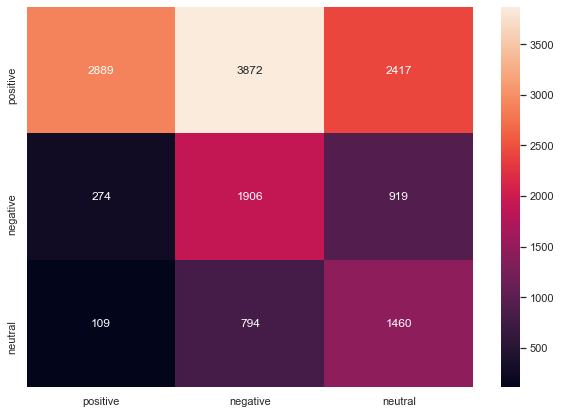

In [93]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["airline_sentiment"].tolist(), data['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['positive', 'negative', 'neutral']],
                  columns = [i for i in ['positive', 'negative', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Observation

The predictions are worse than VADER

## Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob

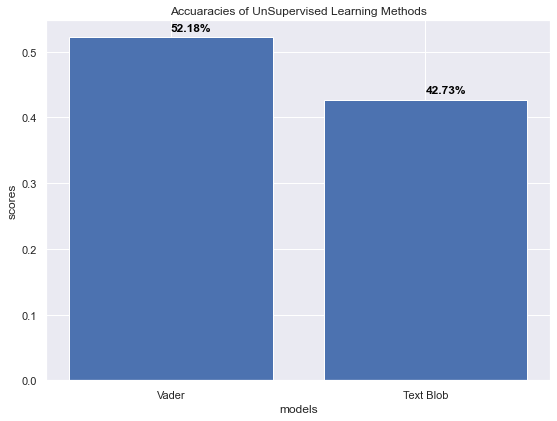

In [94]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["airline_sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["airline_sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

### CONCLUSION AND SUMMARY

* We used a dataset which has tweets in text format for 6 different airlines. The tweet sentiment values were - positive, negative or neutral.

* The goal was to build a model for text-classification.

* We did a proper and deep data analysis. The overall tweets, missing values, tweets for each airline and the their sentiments and the negative reasons causing negative tweets were analysed

* Word count cloud was plotted for negative, positive and neutral words

* We pre-processed the data using various techniques and libraries.

* The pre-processed data is converted to numbers (vectorized), so that we can feed the data into the model.

* We used RandomForrest classifier for both count vectorizer and TD-IDf

* We trained the model and optimized the number of estimators, max_features, which led to an increase the overall accuracy.

* The model was then used to predict results on test data

* Both models achieved approximately 80% accuracy.

* We need to increase the accuracy of the model to predict negative labels. 

* We have observed that most of the negative and neutral labels are being misclassified as positive.

* We also observed that there are still a lot of common words in all the 3 labels word cloud. Probably this is why misclassification is happening

* We can increase the accuracy of the model by adding more data to the dataset.

* We can also tune the model by using other tuning techniques and also other hyperparameters

* More text pre-processing techniques can also be used to increase the accuracy of the nodel

